<a href="https://colab.research.google.com/github/uervitonsantos/Otimiza-o-de-enxame-de-particulas/blob/main/Otimiza%C3%A7%C3%A3o_de_enxame_de_part%C3%ADculas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Otimização de enxame de particulas
Foi utilizado como referencia o artigo:
https://nathanrooy.github.io/posts/2016-08-17/simple-particle-swarm-optimization-with-python/

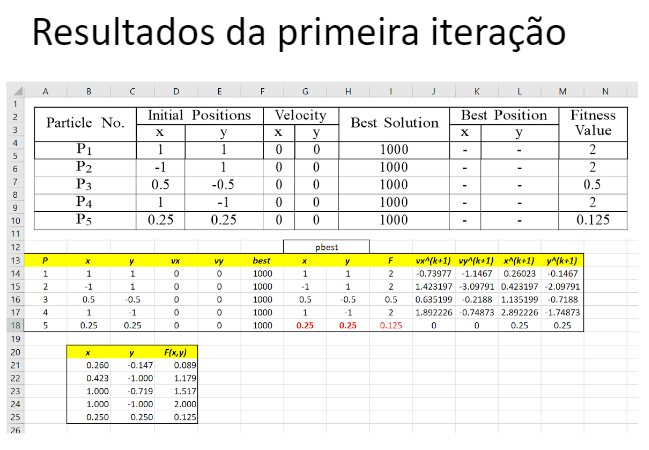

# Exercício
Continue o exemplo anterior até obter uma aproximação da solução com erro máximo de 1.0e-4.


In [64]:
#imports necessarios para o projeto
from __future__ import division #https://docs.python.org/pt-br/3/library/__future__.html
import random
import math
import numpy as np

In [65]:
# função que estamos tentando otimizar (minimizar)
def sphere(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

In [66]:
# definição da função Rastrigin - https://en.wikipedia.org/wiki/Rastrigin_function
def rastrigin(x):
    return 10*len(x) + sum([(xi**2 - 10 * np.cos(2 * math.pi * xi)) for xi in x])

In [67]:
# definição da função rosenbrock - https://en.wikipedia.org/wiki/Rosenbrock_function
def rosenbrock(x):
    total=0
    for i in range(len(x)-1):
        total += 100*((x[i]**2 - x[i+1])**2) + (1-x[i])**2
        return total

In [71]:
#--- MAIN ---------------------------------------------------------------------+
class Particle:
    def __init__(self,x0):
        self.position_i=[]          # posição da partícula
        self.velocity_i=[]          # velocidade da partícula
        self.pos_best_i=[]          # melhor posição individual
        self.err_best_i=-1          # menor erro individual
        self.err_i=-1               # erro individual

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1)) # inicialização aleatoria da velocidade
            self.position_i.append(x0[i])

 # avaliar a aptidão atual
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
        # verifica se a posição atual é a melhor individual
        if self.err_i < self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

# atualiza a nova velocidade das partículas
    def update_velocity(self,pos_best_g):
        w=0.5       # peso de inércia constante (quanto pesar a velocidade anterior)
        c1=1        # constante cognitiva
        c2=2        # constante social

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # atualiza a posição da partícula com base em novas atualizações de velocidade
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            # ajuste a posição máxima se necessário
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # ajuste a posição mínima se necessário
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i]=bounds[i][0]

In [72]:
class PSO():
    def __init__(self,costName,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions
        num_dimensions=len(x0)
        err_best_g=-1   # melhor erro para o grupo
        pos_best_g=[]   # melhor posição para o grupo

        # estabelece o enxame
        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        # inicia o ciclo de otimização
        i=0
        while i < maxiter:
            # ciclo através de partículas em enxame e avalia a aptidão
            for j in range(0,num_particles):
                swarm[j].evaluate(costFunc)

                # determinar se a partícula atual é a melhor (globalmente)
                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)

            # percorrer enxame e atualizar velocidades e posição
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1

      # imprimir resultados
        print('\nFINAL SOLUTION:')
        print(f' Funtcion {costName}')
        print(f'   > {pos_best_g}')
        print(f'   > {err_best_g}\n')

if __name__ == "__PSO__":
    main()

In [73]:
#--- BLOCO DE EXECUÇÂO----------------------------------------------------------------------+
# local de partida inicial [x, y]
initialP1=[1,1]
initialP2=[-1,1] 
initialP3=[0.5, -0.5] 
initialP4=[1, -1] 
initialP5=[0.25, 0.25] 

bounds=[(-10,10),(-10,10)]  # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]

print('------P1-------')
PSO("sphere",sphere,initialP1,bounds,num_particles=100,maxiter=100);
PSO("rastrigin",rastrigin,initialP1,bounds,num_particles=100,maxiter=100);
PSO("rosenbrock",rosenbrock,initialP1,bounds,num_particles=100,maxiter=100);

print('------P2-------')
PSO("sphere",sphere,initialP2,bounds,num_particles=100,maxiter=100);
PSO("rastrigin",rastrigin,initialP2,bounds,num_particles=100,maxiter=100);
PSO("rosenbrock",rosenbrock,initialP2,bounds,num_particles=100,maxiter=100);

print('------P3-------')
PSO("sphere",sphere,initialP3,bounds,num_particles=100,maxiter=100);
PSO("rastrigin",rastrigin,initialP3,bounds,num_particles=100,maxiter=100);
PSO("rosenbrock",rosenbrock,initialP3,bounds,num_particles=100,maxiter=100);

print('------P4-------')
PSO("sphere",sphere,initialP4,bounds,num_particles=100,maxiter=100);
PSO("rastrigin",rastrigin,initialP4,bounds,num_particles=100,maxiter=100);
PSO("rosenbrock",rosenbrock,initialP4,bounds,num_particles=100,maxiter=100);

print('------P5-------')
PSO("sphere",sphere,initialP5,bounds,num_particles=100,maxiter=100);
PSO("rastrigin",rastrigin,initialP5,bounds,num_particles=100,maxiter=100);
PSO("rosenbrock",rosenbrock,initialP5,bounds,num_particles=100,maxiter=100);

------P1-------

FINAL SOLUTION:
 Funtcion sphere
   > [-9.244906888125424e-13, -2.6743422277498494e-14]
   > 8.553982443362016e-25


FINAL SOLUTION:
 Funtcion rastrigin
   > [0.9949586354573356, 0.9949586369235612]
   > 1.9899181141865796


FINAL SOLUTION:
 Funtcion rosenbrock
   > [1, 1]
   > 0.0

------P2-------

FINAL SOLUTION:
 Funtcion sphere
   > [8.672059684083572e-13, 1.2282068820190644e-13]
   > 7.671311130934666e-25


FINAL SOLUTION:
 Funtcion rastrigin
   > [-0.9949586378685029, 0.9949586373374323]
   > 1.9899181141865796


FINAL SOLUTION:
 Funtcion rosenbrock
   > [1.000000000102632, 1.0000000002146003]
   > 1.925038964298916e-20

------P3-------

FINAL SOLUTION:
 Funtcion sphere
   > [-2.9550132387929473e-13, -1.2586060057916108e-13]
   > 1.0316192319256297e-25


FINAL SOLUTION:
 Funtcion rastrigin
   > [1.7717776642968478e-10, 3.394086897712283e-09]
   > 0.0


FINAL SOLUTION:
 Funtcion rosenbrock
   > [0.9999999999824231, 0.9999999999689725]
   > 2.0116383833360786e-21

